In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("forestfires.csv")
print(df.head(5))

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [19]:
def convert_day(day):
    day_dict = {
        "mon": 2,
        "tue": 3,
        "wed": 4,
        "thu": 5,
        "fri": 6,
        "sat": 7,
        "sun": 8,}
    return day_dict.get(day.lower(), -1)

def convert_month(month):
    month_dict = {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12}
    return month_dict.get(month.lower(), -1)

In [20]:
for col_name in df.columns:
    print("TotalNaN:", df[col_name].isna().sum())
    print("TotalNull: ", df[col_name].isna().sum())
    print("Data Type: ", df[col_name].dtype)
    print("+"*10)

TotalNaN: 0
TotalNull:  0
Data Type:  int64
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  int64
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  object
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  object
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  float64
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  float64
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  float64
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  float64
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  float64
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  int64
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  float64
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  float64
++++++++++
TotalNaN: 0
TotalNull:  0
Data Type:  float64
++++++++++


In [21]:
df["month"] = df["month"].apply(convert_month)
df["day"] = df["day"].apply(convert_day)
print(df.head(5))

   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    6  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    3  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    7  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6      3    6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6      3    8  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


**1. Sử dụng Numpy xây dựng phương pháp hồi quy tuyến tính và tiến hành huấn luyện trên bộ dữ liệu Forest Fires**

In [48]:
class LinearRegression:
    def fit(self, X: np.ndarray, Y: np.ndarray) -> None:
        cov = np.matmul(X.T, X)  
        inv_cov = np.linalg.pinv(cov)  
        self.theta_ = inv_cov @ X.T @ Y
        
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return np.square(y-y_hat).mean()**0.5

    def predict(self, X: np.ndarray) -> np.ndarray:
        return X .dot(self.theta_)

def split(X, y, train_size = 0.8):
    X = np.array(X)
    y = np.array(y)

    num_samples = X.shape[0]
    train_size = int(train_size * num_samples)

    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    return X_train, X_test, y_train, y_test

def plot_predictions(y_true, y_hat, title="So sánh giá trị thực tế và dự đoán"):
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_true)), y_true, color='green', label='Giá trị thực tế (y_test)')
    plt.scatter(range(len(y_hat)), y_hat, color='orange', label='Giá trị dự đoán (y_hat)', marker='+')
    plt.xlabel("Chỉ số mẫu")
    plt.ylabel("Diện tích cháy")
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
#Chia tập thuộc tính và giá trị dự đoán
X = df.iloc[: , :-1]
y = df.iloc[:, -1]

#Chuyển sang numpy
x_train,x_test,y_train,y_test = split(X.to_numpy(), y.to_numpy(), train_size = 0.8)

print("Số mẫu training:", x_train.shape[0])
print("Số mẫu testing:", x_test.shape[0])

In [33]:
#Huấn luyện mô hình
lm = LinearRegression()
lm.fit(x_train, y_train)

In [60]:
#Dự đoán trên tập huấn luyện
y_hat_train = lm.predict(x_train)
print("Giá trị dự đoán:", y_hat_train[:5])
print("rmse:", lm.rmse(y_train, y_hat_train))

Giá trị dự đoán: [  3.99840053  11.22597832  17.9210381  -12.1378559   -4.76952305]
rmse: 58.06759092585429


In [35]:
# Dự đoán trên tập kiểm tra
y_hat_test = lm.predict(x_test)
rmse_test = lm.rmse(y_test, y_hat_test)
print("RMSE trên tập kiểm tra:", rmse_test)

RMSE trên tập kiểm tra: 79.97091407114637


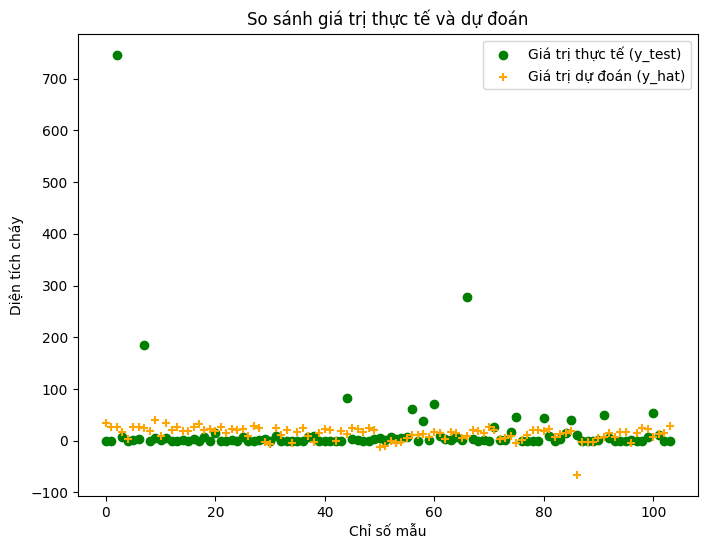

In [50]:
plot_predictions(y_test,y_hat_test)

**2. Chuẩn hóa dữ liệu về phân phối có kỳ vọng là 0 và phương sai là 1**

In [24]:
#Chuẩn hóa theo phân phối Chuẩn
X_copy = X.copy()
X_mean = np.mean(X_copy, axis=0)
X_std = np.std(X_copy, axis=0)
X_scaled = (X_copy - X_mean) / X_std

y_copy = y.copy()
y_mean = np.mean(y_copy, axis=0)
y_std = np.std(y_copy, axis=0)
y_scaled = (y_copy - y_mean) / y_std

print(X_scaled)
print(y_scaled)

            X         Y     month       day      FFMC       DMC        DC  \
0    1.008313  0.569860 -1.968443  0.357721 -0.805959 -1.323326 -1.830477   
1    1.008313 -0.244001  1.110120 -1.090909 -0.008102 -1.179541  0.488891   
2    1.008313 -0.244001  1.110120  0.840597 -0.008102 -1.049822  0.560715   
3    1.440925  1.383722 -1.968443  0.357721  0.191362 -1.212361 -1.898266   
4    1.440925  1.383722 -1.968443  1.323474 -0.243833 -0.931043 -1.798600   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.289524 -1.057862  0.230531  1.323474 -1.640083 -0.846648  0.474768   
513 -1.154748 -0.244001  0.230531  1.323474 -1.640083 -0.846648  0.474768   
514  1.008313 -0.244001  0.230531  1.323474 -1.640083 -0.846648  0.474768   
515 -1.587360 -0.244001  0.230531  0.840597  0.680957  0.549003  0.269382   
516  0.575701 -1.057862  1.549915 -1.090909 -2.020879 -1.685913 -1.780442   

          ISI      temp        RH      wind      rain  
0   -0.860946 -1.84

In [36]:
# Chia tập train/test
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = split(X_scaled.to_numpy(), y_scaled.to_numpy(), train_size=0.8)
print("Số mẫu training:", x_scaled_train.shape[0])
print("Số mẫu testing:", x_scaled_test.shape[0])

Số mẫu training: 413
Số mẫu testing: 104


In [59]:
# Huấn luyện mô hình
lm_scaled = LinearRegression()
lm_scaled.fit(x_scaled_train, y_scaled_train)
# Dự đoán trên tập huấn luyện
y_hat_scaled_train = lm.predict(x_scaled_train)
print("Giá trị dự đoán:", y_hat_scaled_train[:5])
print("RMSE trên tập huấn luyện:", lm.rmse(y_scaled_train, y_hat_scaled_train))

Giá trị dự đoán: [ -3.26418684   3.76664206   7.1041406  -12.61194102  -2.90804917]
RMSE trên tập huấn luyện: 4.128998830193063


In [37]:
# Dự đoán trên tập kiểm tra
y_hat_scaled_test = lm_scaled.predict(x_scaled_test)
rmse_scaled_test = lm_scaled.rmse(y_scaled_test, y_hat_scaled_test)
print("RMSE trên tập kiểm tra:", rmse_scaled_test)

RMSE trên tập kiểm tra: 1.2531131916441092


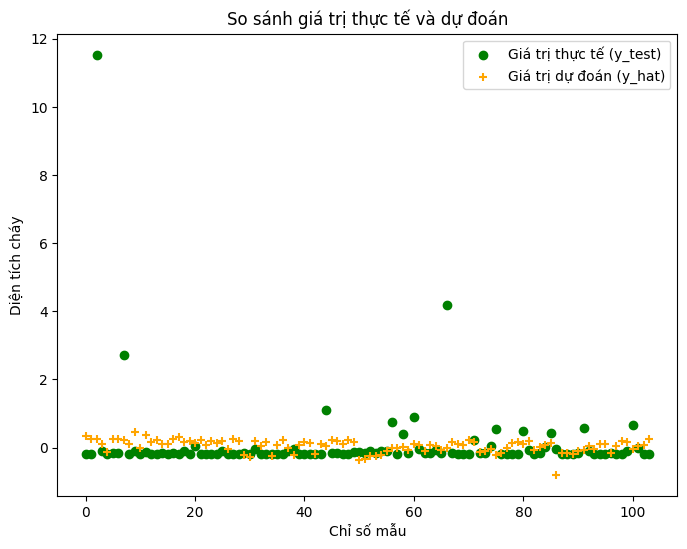

In [51]:
plot_predictions(y_scaled_test,y_hat_scaled_test)

|  | Huấn luyện | Kiểm tra |
|-------|-------|-------|
| Trước khi chuẩn hóa   | 58.07     | 79.97    |
| Sau khi chuẩn hóa    | 4.13      | 1.25     |

Xét theo giá trị RMSE:
- Trước khi và sau khi chuẩn hóa, đều có sự giảm sai số dự đoán đáng kể. 
- Trước khi chuẩn hóa, sự chênh lệch giữa RMSE trên tập huấn luyện và tập kiểm tra khá lớn, có thể cho thấy mô hình đang gặp vấn đề overfitting.
- Sau khi chuẩn hóa, khoảng cách giữa hai RMSE (4.13 vs. 1.25) nhỏ hơn nhiều 
=> Mô hình tổng quát hóa tốt hơn.

Xét các giá trị dự đoán (y_hat): 
- Sau khi chuẩn hóa, chúng có xu hướng gom cụm lại và phân bố chặt chẽ hơn so với trước đó. 
=> Mô hình có khả năng khái quát hóa tốt hơn, tránh hiện tượng bị ảnh hưởng quá mức bởi các đặc trưng có phạm vi giá trị lớn. 

**3. Tiến hành kỹ thuật Feature Engineering**

Chỉ lấy những thuộc tính có kiểu dữ liệu là số thực

In [13]:
X_float = X.drop(columns=X.select_dtypes(exclude=['float']).columns)

Có 2 cách tiêu biểu để tiến hành kỹ thuật này:
1. Vẽ biểu đồ tán xạ (scatter plot) giữa các biến để kiểm tra mối quan hệ tuyến tính.
2. Vẽ ma trận hệ số tương quan Pearson giữa các biến.

*1. Biểu đồ tán xạ*

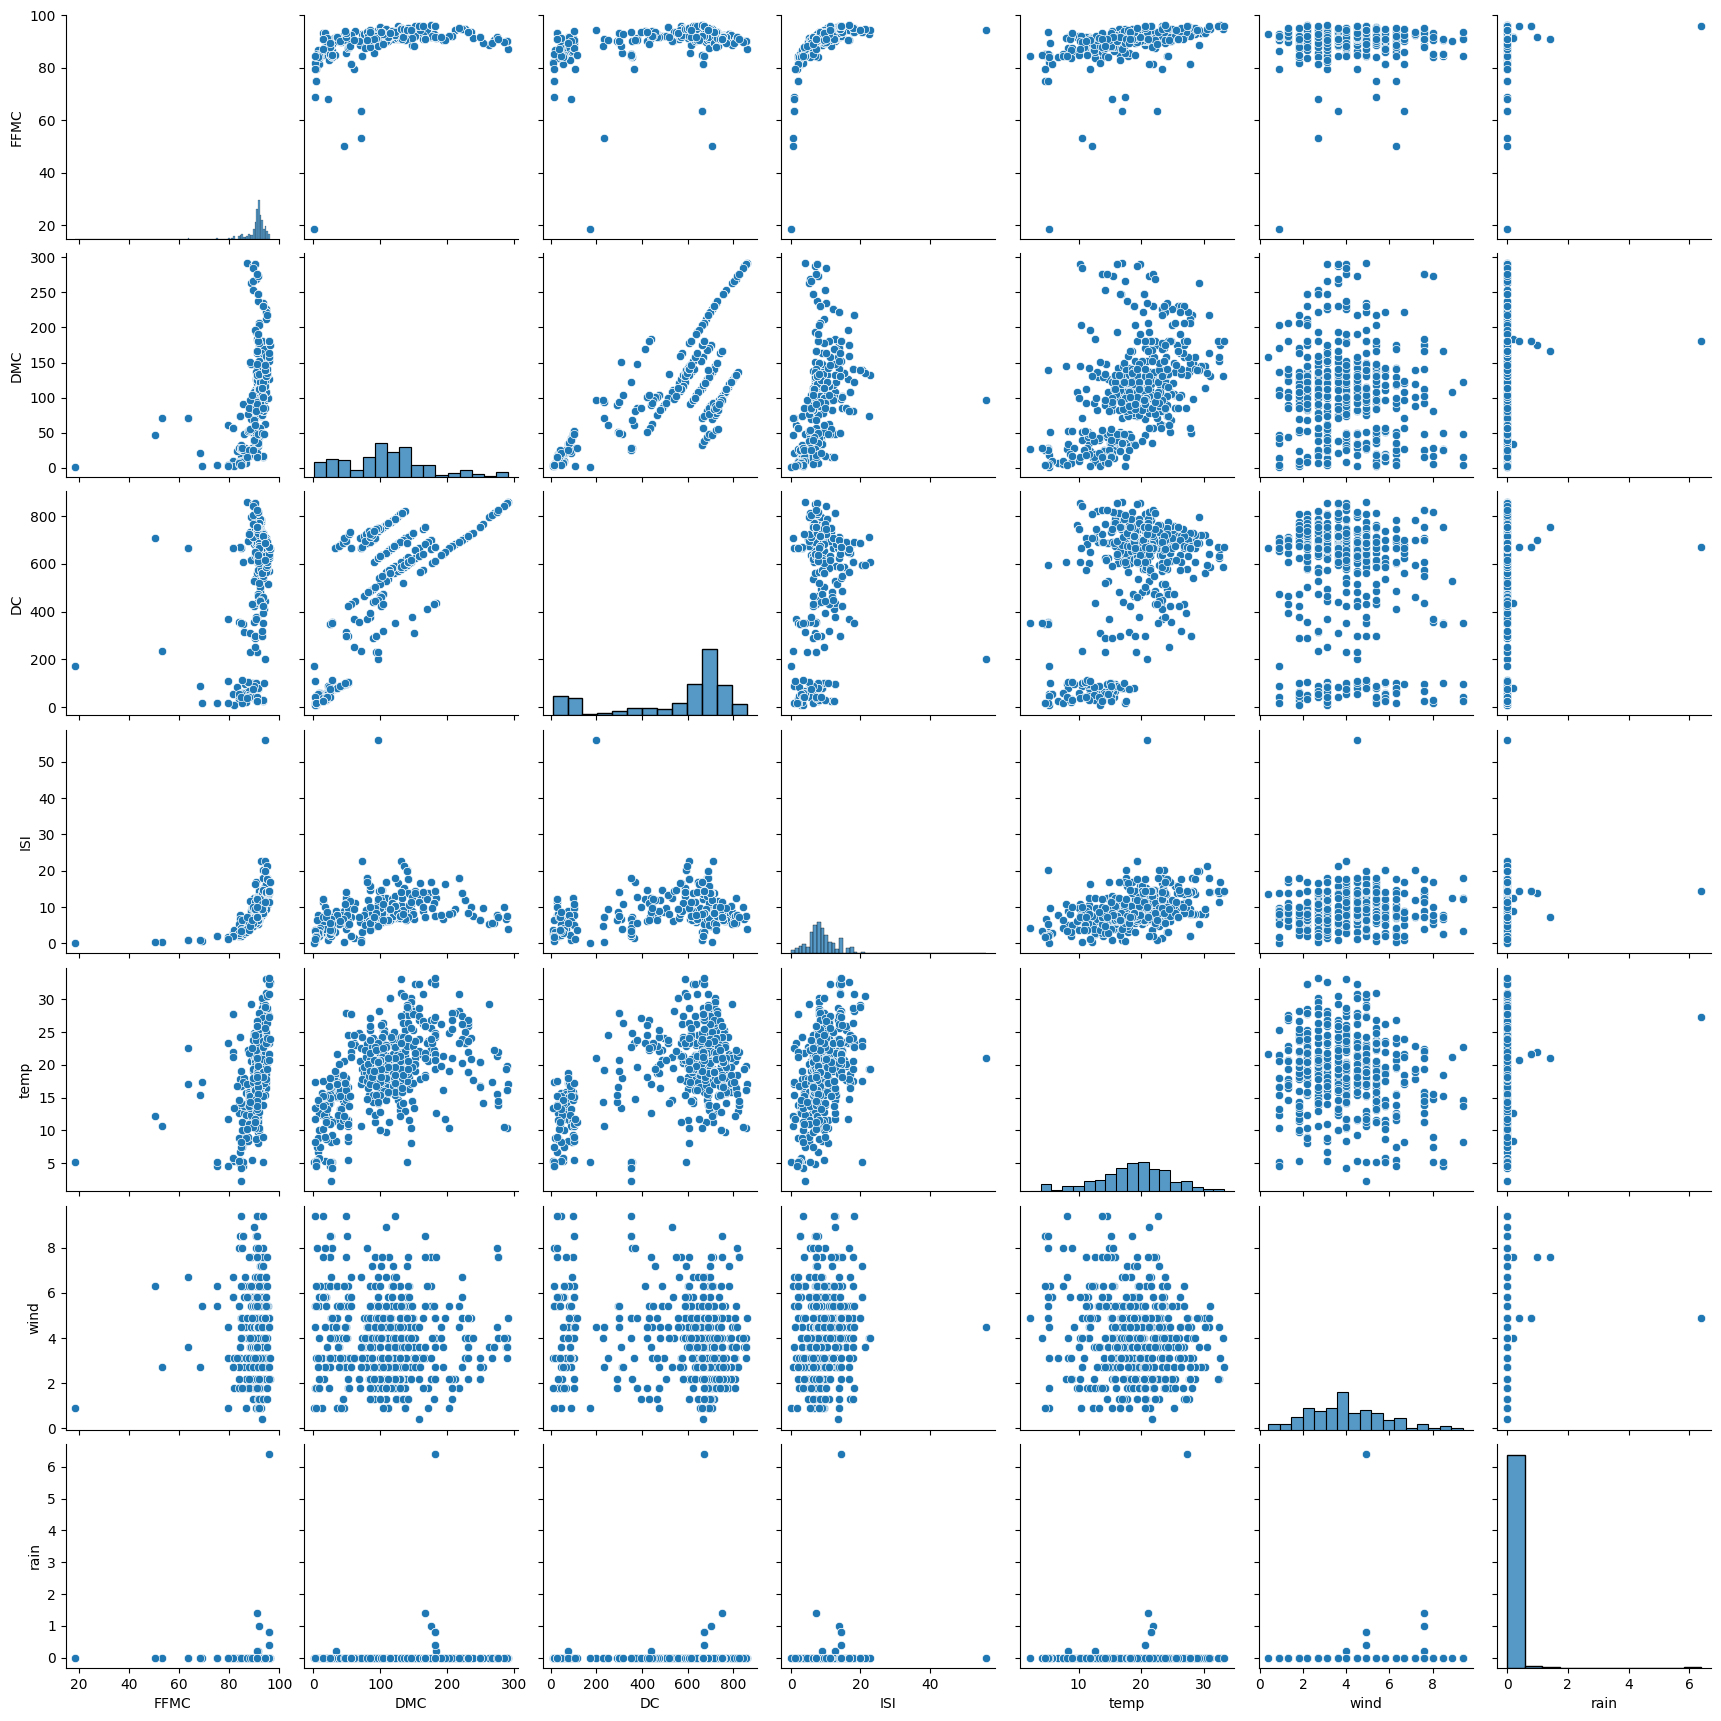

In [14]:
import seaborn as sns

sns.pairplot(X_float)
plt.show()

Vì đa phần các cặp thuộc tính có các điểm dữ liệu phân tán ngẫu nhiên → Không có collinearity đáng kể.

*2. Vẽ ma trận hệ số tương quan Pearson*

In [15]:
corr_matrix1 = X_float.corr()

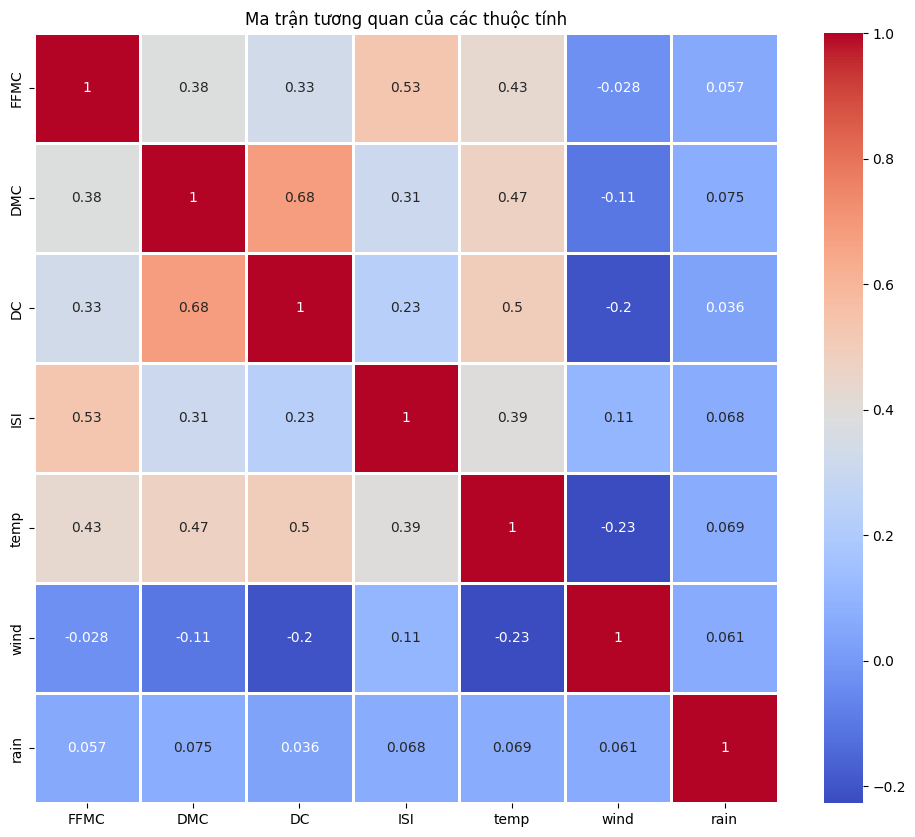

In [16]:
import seaborn as sns

plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix1, annot = True, cmap = 'coolwarm', linewidths = 2.0)
plt.title('Ma trận tương quan của các thuộc tính')
plt.show()

Do các thuộc tính tương quan lẫn nhau từ mức trung bình tới yếu (|r| < 0.8) nên việc giữ hay loại bỏ thuộc tính nào đó không quá quan trọng.

Mặc dù $corr(DC,DMC) \approx 0.68 $ (độ tương quan không cao) nhưng hãy thử loại bỏ 1 trong 2 thuộc tính này để xem xét kết quả dự đoán có bị ảnh hưởng hay không.

In [27]:
df_copy = df.copy()
df_copy = df_copy.drop(columns = ['DMC'])

In [28]:
X1 = df_copy.iloc[: , :-1]
y1 = df_copy.iloc[:, -1]
x_train1, x_test1, y_train1, y_test1 = split(X1 ,y1, train_size = 0.8)

In [39]:
lm1 = LinearRegression()
lm1.fit(x_train1, y_train1)

In [57]:
y_hat_train1 = lm1.predict(x_train1)
print("Giá trị dự đoán:", y_hat_train1[:5])
print("RMSE trên tập huấn luyện:", lm.rmse(y_train1, y_hat_train1))

Giá trị dự đoán: [ 4.87223414 16.83579383 22.48205477 -9.46103711 -3.63402049]
RMSE trên tập huấn luyện: 58.204901293808646


In [41]:
y_hat_test1 = lm1.predict(x_test1)
rmse_test1 = lm1.rmse(y_test1, y_hat_test1)
print("RMSE trên tập kiểm tra:", rmse_test1)

RMSE trên tập kiểm tra: 80.0600137693629


RMSE trên tập huấn luyện và kiểm tra không quá chênh lệch so với bộ dữ liệu gốc. Do đó, việc bỏ thuộc tính này cũng không có ý nghĩa cải thiện nhiều.

**4. Sử dụng thư viện Machine Learning (Sklearn hoặc Skorch) thực thi lại phương pháp Linear Regression**

Trên tập dữ liệu gốc:

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X2 = X.copy()
y2 = y.copy()
# Chia tập huấn luyện và kiểm tra
X2_train, X2_test, y2_train, y2_test = train_test_split(X2.to_numpy(), y2.to_numpy(), test_size=0.2, random_state=0)

# Huấn luyện mô hình trên tập huấn luyện
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y2_hat_train = lm2.predict(X2_train)
y2_hat_test = lm2.predict(X2_test)

# Tính RMSE
rmse_train2 = np.sqrt(mean_squared_error(y2_train, y2_hat_train))
rmse_test2 = np.sqrt(mean_squared_error(y2_test, y2_hat_test))

print("Giá trị dự đoán:", y2_hat_train[:5])
print("RMSE trên tập huấn luyện:", rmse_train2)
print("RMSE trên tập kiểm tra:", rmse_test2)

Giá trị dự đoán: [ 0.96356037  1.33972637 13.33198598  0.30625774 12.40322781]
RMSE trên tập train: 43.92460724588722
RMSE trên tập test: 109.99059441947871


Trên tập dữ liệu chuẩn hóa:

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X_scaled1 = X_scaled.copy()
y_scaled1 = y_scaled.copy()
# Chia tập huấn luyện và kiểm tra 
X_train_scaled1, X_test_scaled1, y_train_scaled1, y_test_scaled1 = train_test_split(X_scaled1.to_numpy(), y_scaled1.to_numpy(), test_size=0.2, random_state=0)

# Huấn luyện mô hình trên tập huấn luyện
lm_scaled1 = LinearRegression()
lm_scaled1.fit(X_train_scaled1, y_train_scaled1)

# Dự đoán trên tập huấn luyện và kiểm tra
y_hat_train_scaled1 = lm_scaled1.predict(X_train_scaled1)
y_hat_test_scaled1 = lm_scaled1.predict(X_test_scaled1)

# Tính RMSE
rmse_train_scaled1 = np.sqrt(mean_squared_error(y_train_scaled1, y_hat_train_scaled1))
rmse_test_scaled1 = np.sqrt(mean_squared_error(y_test_scaled1, y_hat_test_scaled1))

print("Giá trị dự đoán:", y_hat_train_scaled1[:5])
print("RMSE trên tập huấn luyện:", rmse_train_scaled1)
print("RMSE trên tập kiểm tra:", rmse_test_scaled1)

Giá trị dự đoán: [-0.18686809 -0.180953    0.00762167 -0.19720398 -0.00698278]
RMSE trên tập train: 0.6907011850062409
RMSE trên tập test: 1.7295688833322032


Giá trị RMSE:

|  | Numpy | Sklearn |
|-------|-------|-------|
| Bộ dữ liệu gốc - huấn luyện     |  58.07   | 43.92     |
| Bộ dữ liệu gốc - kiểm tra  | 80    | 110    |
| Bộ dữ liệu chuẩn hóa - huấn luyện   | 4.13     | 0.69     |
| Bộ dữ liệu chuẩn hóa - kiểm tra   | 1.25     | 1.73    |

- Trước chuẩn hóa: RMSE trên tập huấn luyện nhỏ hơn NumPy, nhưng bị overfitting (RMSE trên tập kiểm tra cao hơn nhiều).
- Sau chuẩn hóa: RMSE giảm rất mạnh trên tập huấn luyện nhưng vẫn cao hơn NumPy trên tập kiểm tra.
- => Mô hình Sklearn có thể bị tối ưu hóa quá mức trên tập huấn luyện, dẫn đến khả năng khái quát kém hơn một chút so với NumPy.